In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Ad.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df=df.drop('Unnamed: 0',axis=1)

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.shape

(200, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
#Checking null values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

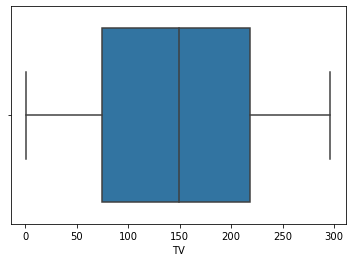

In [14]:
#Checking for outliers
plt1 = sns.boxplot(df['TV'])


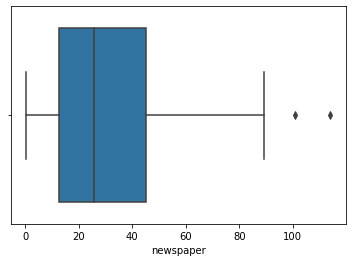

In [16]:
plt2 = sns.boxplot(df['newspaper'])

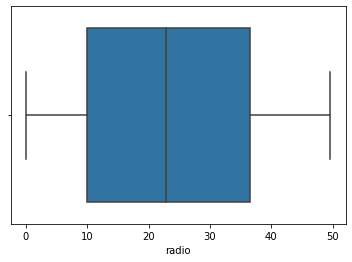

In [17]:
plt3 = sns.boxplot(df['radio'])

There are no considerable outliers present in the data.

# Data Visualization

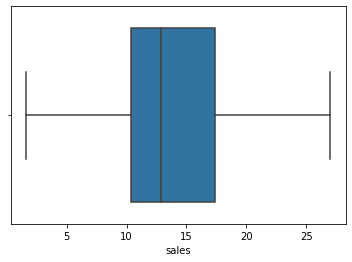

In [18]:
#Univariate analysis
sns.boxplot(df['sales'])

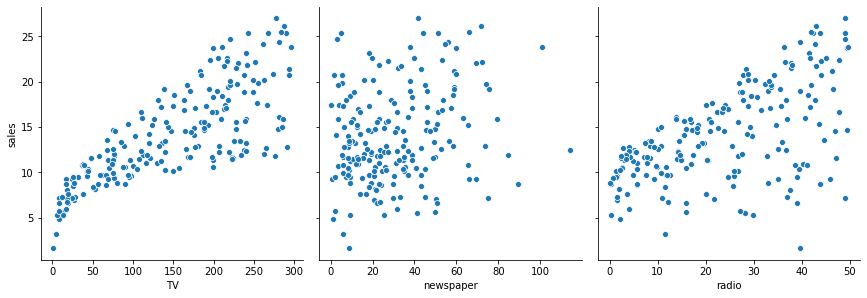

In [20]:
#bivariate analysis
sns.pairplot(df, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

TV= Advertising in tv increases the sales

newspaper =The data is very spreaded, no specific pattern.

radio= Appears to be spreaded as well but shows slight increase in sales with increase in advertising

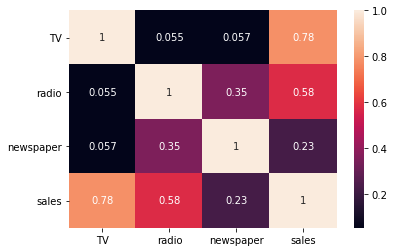

In [22]:
sns.heatmap(df.corr(),annot=True)

Tv is highly correlated with sales

# Train, Test split

In [23]:
X=df['TV']
y=df['sales']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 101)

In [25]:
X_train.head()

85     193.2
183    287.6
127     80.2
53     182.6
100    222.4
Name: TV, dtype: float64

In [26]:
y_train.head()

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
Name: sales, dtype: float64

In [27]:
import statsmodels.api as sm

In [28]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [29]:
lr = sm.OLS(y_train, X_train_sm).fit()

In [30]:
lr.params

const    7.177058
TV       0.047042
dtype: float64

In [31]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     204.4
Date:                Sun, 30 May 2021   Prob (F-statistic):           5.11e-29
Time:                        13:40:31   Log-Likelihood:                -363.95
No. Observations:                 140   AIC:                             731.9
Df Residuals:                     138   BIC:                             737.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1771      0.571     12.573      0.0

Looking at some key statistics from the summary
The values we are concerned with are -

The coefficients and significance (p-values)
R-squared
F statistic and its significance
1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.816
Meaning that 81.6% of the variance in Sales is explained by TV

This is a decent R-squared value.

3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

Sales=6.948+0.054×TV

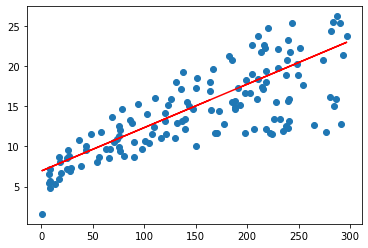

In [32]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [33]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

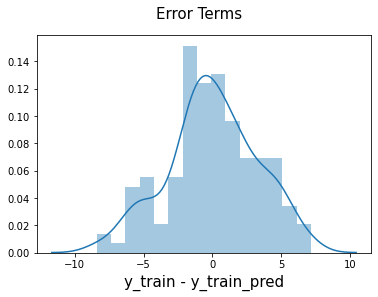

In [34]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

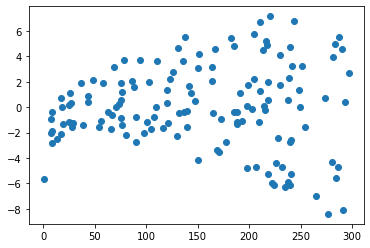

In [35]:
plt.scatter(X_train,res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

### Predictions on the Test Set

In [36]:
X_test_sm = sm.add_constant(X_test)

In [37]:
y_pred = lr.predict(X_test_sm)

In [38]:
y_pred.head()

37     10.691069
109    19.191496
31     12.488060
89     12.342231
66      8.658870
dtype: float64

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [40]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.2122352689386475

In [41]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.6345141851817352

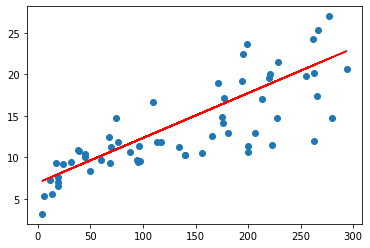

In [42]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()